In [2]:
# LOGISTIC REGRESSION IMPELEMENTATION
# Importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Training and testing data preperation
#we can either use Small training data or Large Training Data
# training_data = pd.read_csv("../Data/TrainingData.csv")
training_data = pd.read_csv("../Data/LargeTrainingData.csv")

In [4]:
# Define model, train and test
from sklearn.linear_model import LogisticRegression

#defining features and targets to be tested against
targets = training_data['home_team_result'].values 
features = training_data.drop(["home_team_name", "away_team_name", "home_team_goal_count" ,"away_team_goal_count", "winner_encoded", "home_team_result"  ], axis=1)

training_features , training_targets = features, targets

testing_data = pd.read_csv("../Data/TestingData.csv")
test_target = testing_data['home_team_result'].values
testing_data = testing_data.drop(["home_team_result"],axis=1)

test_features = testing_data.drop(["home_team_name", "away_team_name", "home_team_goal_count" ,"away_team_goal_count" ], axis=1)

#spliting into target and value sets for logistic regression model
testing_features, testing_targets = test_features, test_target

#calling and applying logistic regression model
model = LogisticRegression(max_iter = 1000)

#fitting model to data set
model.fit(training_features, training_targets)

outcome_predict = model.predict(testing_features)


#printing to view the predictions as a 0 or 1
print(model.predict(testing_features))
print(model.score(testing_features, testing_targets))





[1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
[1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.]
0.75


In [8]:
# Generate graphs
from sklearn.metrics import confusion_matrix 

cf_matrix = confusion_matrix(outcome_predict,testing_targets)

print(cf_matrix)



[[3 2]
 [2 9]]


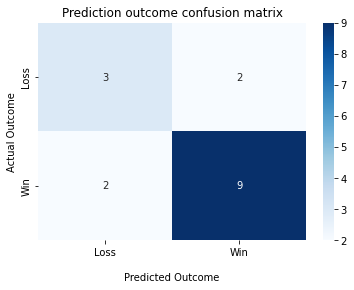

In [6]:
import seaborn as sns 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Prediction outcome confusion matrix')
ax.set_xlabel('\nPredicted Outcome')
ax.set_ylabel('Actual Outcome');

ax.xaxis.set_ticklabels(['Loss','Win'])
ax.yaxis.set_ticklabels(['Loss','Win'])

plt.show()
# fig = plt.figure()
# fig.savefig("anything.png")

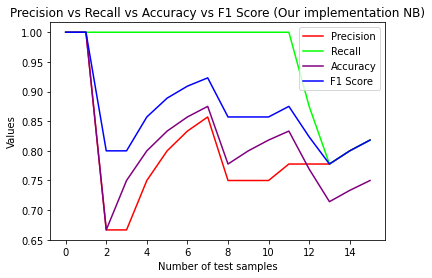

In [7]:
# Precision and Recall
def precisionAndRecall(predictedValues):
    actualValues = [1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1]
    truePositives = 0
    trueNegatives = 0
    falsePositives = 0
    falseNegatives = 0
    precision = []
    recall = []
    accuracy = []
    f1 = []

    for index in range(len(predictedValues)):
        if(predictedValues[index]==1 and actualValues[index]==1):
            truePositives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))
            
        
        if(predictedValues[index]==1 and actualValues[index]==0):
            falsePositives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))
        
        if(predictedValues[index]==0 and actualValues[index]==0):
            trueNegatives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))

        if(predictedValues[index]==0 and actualValues[index]==1):
            falseNegatives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))

    return precision,recall,accuracy,f1

precision, recall, accuracy, f1 = precisionAndRecall(outcome_predict)

plt.title("Precision vs Recall vs Accuracy vs F1 Score (Our implementation NB)")
plt.xlabel("Number of test samples")
plt.ylabel("Values")
plt.plot(precision,color = "red", label = "Precision")
plt.plot(recall,color = "lime", label = "Recall")
plt.plot(accuracy,color = "purple", label = "Accuracy")
plt.plot(f1,color = "blue", label = "F1 Score")

plt.legend()
plt.show()
